# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

In [6]:
# Compute current value of my crpto
my_btc_value = float(btc_price)*1.2
my_eth_value = float(eth_price)*5.3
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47272.54
The current value of your 5.3 ETH is $14103.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [9]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [11]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_combined = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
df_combined

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_combined["AGG"]["close"].values
spy_close_price = df_combined["SPY"]["close"].values

In [13]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $[119.43]
Current SPY closing price: $[334.57]


In [14]:
# Compute the current value of shares
my_agg_value = my_agg * int(agg_close_price)
my_spy_value = my_spy * int(spy_close_price)
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16700.00
The current value of your 200 AGG shares is $23800.00


### Savings Health Analysis

In [15]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Combine the crypto and shares DataFrames
# Create savings DataFrame
df_savings = pd.DataFrame({
    "" : ["crypto","shares"],
    "amount": [crypto,shares]
})
df_savings = df_savings.set_index('')
# Display savings DataFrame
display(df_savings)

,amount
,
crypto,61376.069541
shares,40500.000000


(-1.1139365806238606,
 1.118574575067813,
 -1.113003907954194,
 1.1006192748741743)

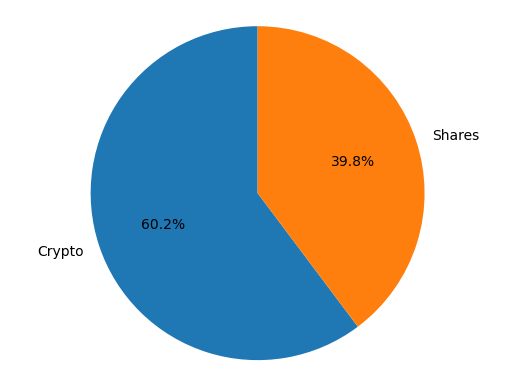

In [16]:
# Plot savings pie chart
total_savings = crypto + shares

crypto_percent = crypto / total_savings * 100
shares_percent = shares / total_savings * 100

labels = ['Crypto', 'Shares']
values = [crypto_percent, shares_percent]

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings['amount'].sum()
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f"Congratulations! Your total savings of ${total_savings:.2f} exceed your emergency fund goal of ${emergency_fund:.2f}.")
elif total_savings == emergency_fund:
    print(f"Congratulations! Your total savings of ${total_savings:.2f} reached your emergency fund goal of ${emergency_fund:.2f}.")
else:
    print(f"Your total savings of ${total_savings:.2f} are less than your emergency fund goal of ${emergency_fund:.2f}. You need to save ${emergency_fund - total_savings:.2f} more.")

Congratulations! Your total savings of $101876.07 exceed your emergency fund goal of $36000.00.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG_2 = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY_2 = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_2, SPY_2], axis=1, keys=['AGG', 'SPY'])
df_stock_data

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
simulation= MCSimulation(
    portfolio_data = df_stock_data,
    weights = (0.4,0.6),
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
simulation.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\boun\Downloads\FinTech\Module_5_homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992803,1.001379,1.022333,1.006461,1.004337,1.000214,0.992127,1.011305,1.000974,0.996148,...,1.003129,1.001773,1.005089,0.992692,1.004706,1.003286,0.996449,0.999310,1.001164,0.989669
2,0.984001,0.999477,1.026054,1.000520,0.999994,1.003129,1.001449,1.012772,1.001747,1.000313,...,1.000283,0.993458,1.015865,0.988482,1.007337,1.006858,0.994623,1.004954,0.999421,0.984687
3,0.992394,1.004861,1.026980,0.992850,1.007976,0.998271,0.998813,1.016777,0.994316,0.995508,...,1.000138,0.987060,1.019145,0.995960,1.006825,1.008084,1.000292,0.999013,1.008879,0.980390
4,0.986152,1.003375,1.030761,0.988318,1.006843,0.994741,0.993180,1.020387,0.991994,0.980601,...,1.003870,0.993024,1.026822,0.997020,1.017770,1.008425,0.994629,1.001663,1.018089,0.975495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.558289,14.355827,8.256044,20.760326,77.846280,13.421318,7.628450,10.474662,18.985364,11.061092,...,7.198604,17.700391,19.261400,13.948211,18.291781,12.776572,24.623228,37.740705,18.957848,8.204797
7557,5.567641,14.279627,8.125718,20.744744,78.911257,13.446277,7.663522,10.523472,18.881142,11.176299,...,7.167775,17.654373,19.244613,13.911864,18.257731,12.771021,24.494814,37.850695,18.872472,8.304980
7558,5.613322,14.398719,8.158967,20.777735,78.543981,13.391140,7.684572,10.687820,19.043914,11.268410,...,7.177960,17.545641,19.166867,13.938635,18.174963,12.726461,24.753017,37.990379,18.795620,8.351048
7559,5.602822,14.293619,8.176165,20.905333,79.137500,13.455172,7.673440,10.699576,19.143058,11.274137,...,7.054568,17.585433,19.270266,13.935860,18.165972,12.622557,24.829614,38.070671,18.614983,8.280418


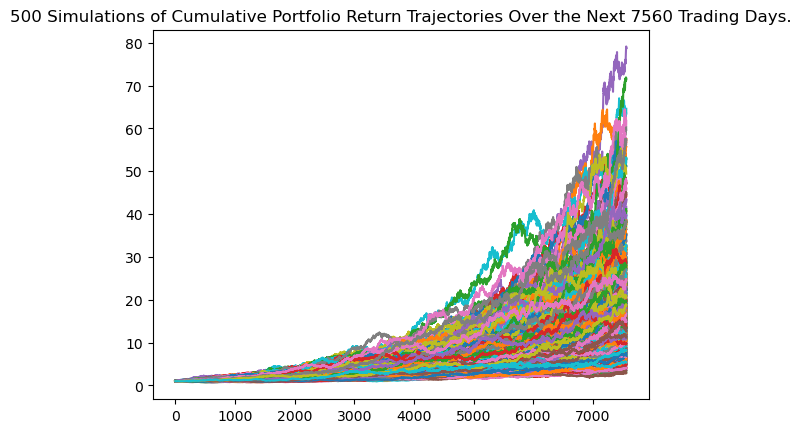

In [23]:
# Plot simulation outcomes
line_plot = simulation.plot_simulation()

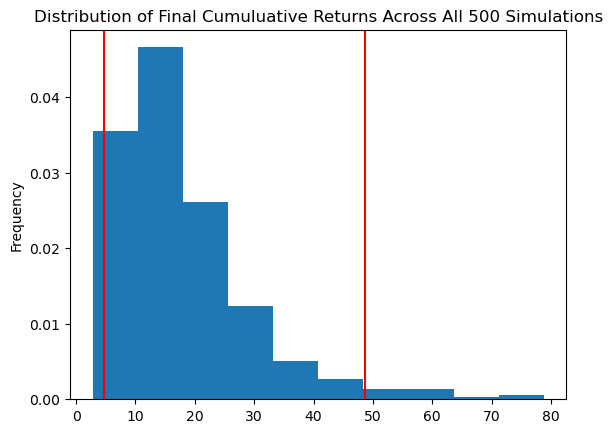

In [24]:
# Plot probability distribution and confidence intervals
line_plot = simulation.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = simulation.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl

count           500.000000
mean             17.627248
std              11.371747
min               2.820670
25%               9.976475
50%              14.681720
75%              22.118413
max              78.775355
95% CI Lower      4.768734
95% CI Upper     48.685582
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95374.68 and $973711.64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143062.02 and $1460567.46


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\boun\Downloads\FinTech\Module_5_homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995094,1.002576,1.000851,1.002698,0.987042,1.013296,0.981193,0.995780,1.002007,0.984586,...,1.009150,0.992827,0.985924,0.995807,0.994320,1.003679,0.998268,0.995274,1.009357,0.993205
2,0.992346,1.001950,0.998392,1.002626,0.995007,1.017623,0.993962,0.998482,1.000876,0.963018,...,1.001614,0.998039,0.995526,1.000555,1.005404,1.002495,1.011232,0.997045,1.008597,1.002016
3,0.997045,1.013695,1.007923,1.011184,1.007890,1.012303,0.991512,1.003716,0.976833,0.959559,...,1.019348,0.981417,1.004387,1.002740,1.006010,0.997587,1.011038,1.000714,1.016641,0.998770
4,0.987344,1.009505,0.995736,1.008987,1.010916,1.003114,0.988852,1.008812,0.963945,0.963727,...,1.028095,0.995428,1.007073,0.992806,1.007007,1.001987,1.008171,0.979986,1.025067,1.001422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.209912,2.139361,1.700031,2.030300,2.149693,1.868212,1.108256,1.614803,1.011781,3.283530,...,1.750964,1.948964,1.489251,1.770885,1.924282,1.907819,1.066948,1.601723,1.186712,1.076803
1257,1.224931,2.139501,1.701013,2.048401,2.157843,1.861226,1.115578,1.627170,1.006553,3.249890,...,1.705194,1.953376,1.514623,1.785569,1.936067,1.935567,1.063204,1.595013,1.191902,1.080868
1258,1.227559,2.131557,1.705401,2.051021,2.155796,1.836830,1.117130,1.611297,1.014781,3.300351,...,1.686662,1.949093,1.523752,1.800069,1.940892,1.931300,1.063886,1.610946,1.189662,1.075755
1259,1.224733,2.141455,1.710981,2.058125,2.179224,1.838285,1.128115,1.602626,1.001720,3.272449,...,1.671569,1.966360,1.532005,1.800257,1.924255,1.918675,1.062466,1.617978,1.186671,1.070319


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

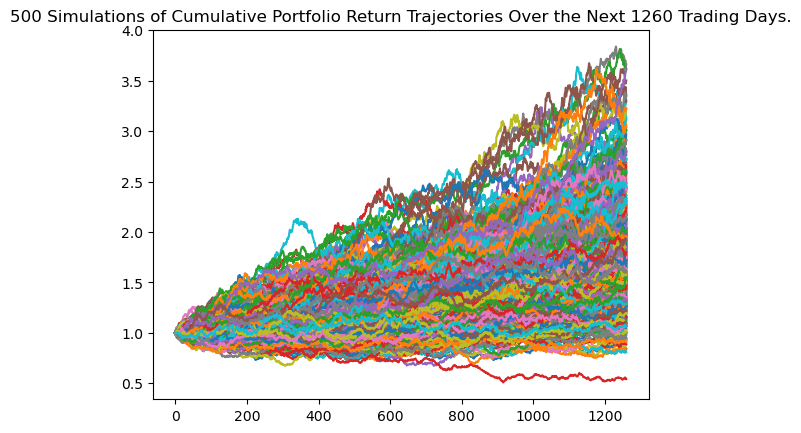

In [30]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_five_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

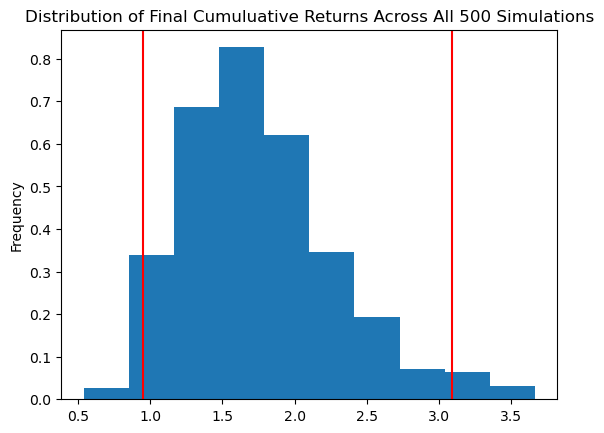

In [31]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_five_years.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five_yrs = MC_five_years.summarize_cumulative_return()
# Print summary statistics
print(tbl_five_yrs)

count           500.000000
mean              1.751851
std               0.527807
min               0.541673
25%               1.379825
50%               1.692587
75%               2.031866
max               3.662745
95% CI Lower      0.949134
95% CI Upper      3.086338
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five_yrs[8]*initial_investment,2)
ci_upper_five = round(tbl_five_yrs[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18982.69 and $61726.76


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\boun\Downloads\FinTech\Module_5_homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995309,0.999128,1.009282,1.004693,1.013507,1.016010,0.989932,1.003017,0.997149,1.012536,...,0.994598,0.990847,0.989896,1.021084,0.988454,1.006803,1.002317,1.004472,1.001568,0.987102
2,1.012559,0.999355,1.012901,0.994229,1.020307,1.012431,0.998086,0.990129,1.014851,1.009077,...,0.987846,0.993761,0.984069,1.039854,0.997566,1.015419,1.012463,1.016515,1.006730,0.986230
3,1.005598,0.991887,1.005588,0.988138,1.031659,1.012050,0.991462,0.998248,1.019330,1.014641,...,0.987046,1.000050,0.986520,1.049876,1.006338,1.019217,1.012751,1.012291,0.993303,0.982446
4,1.006475,0.988838,1.010148,0.992530,1.024339,1.013155,0.986070,0.991138,1.029767,1.009871,...,0.984773,1.001020,0.996338,1.055507,0.997606,1.007255,1.013583,1.024391,0.983527,0.977921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.883999,4.007741,4.209487,6.970090,6.180598,3.270606,1.539488,4.345958,3.072873,6.062685,...,1.310723,1.831198,6.183491,1.031256,2.015774,2.055400,2.723862,4.781307,3.055211,2.564053
2517,3.908807,3.996100,4.232340,7.014955,6.243098,3.322381,1.554491,4.367609,3.091494,5.974670,...,1.310127,1.847174,6.273599,1.035581,2.033741,2.053914,2.741027,4.766194,3.045480,2.594913
2518,3.836549,4.059843,4.203797,7.102331,6.210419,3.296666,1.542854,4.357306,3.106968,5.998356,...,1.329354,1.836417,6.197913,1.022282,2.040284,2.039254,2.749852,4.706680,2.985348,2.579198
2519,3.805312,4.010771,4.230931,7.089027,6.269915,3.305240,1.537530,4.381231,3.127211,6.034785,...,1.347950,1.854200,6.194968,1.023438,2.043734,2.039570,2.743305,4.771929,3.005747,2.591316


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

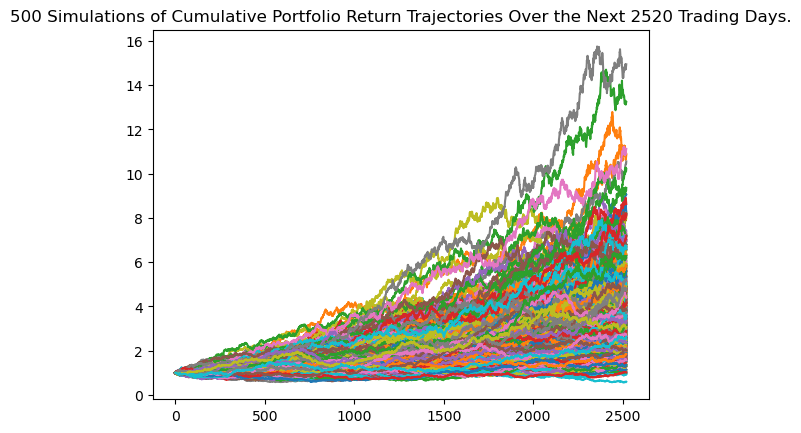

In [36]:
# Plot simulation outcomes
MC_ten_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

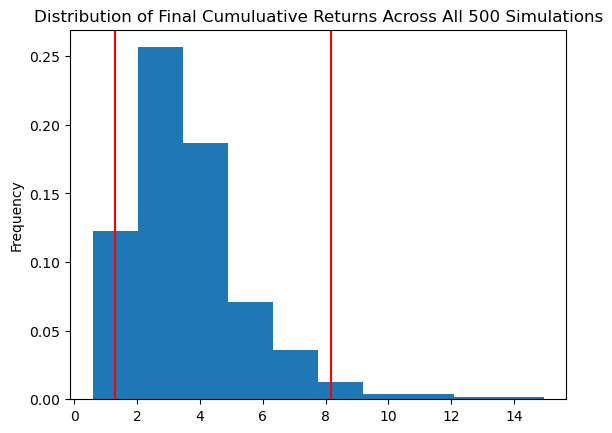

In [37]:
# Plot probability distribution and confidence intervals
MC_ten_years.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten_yrs = MC_ten_years.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten_yrs)

count           500.000000
mean              3.650588
std               1.881437
min               0.595317
25%               2.274712
50%               3.283002
75%               4.463062
max              14.940679
95% CI Lower      1.295415
95% CI Upper      8.188584
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten_yrs[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten_yrs[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $25908.3 and $163771.68


### Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years

It's not possible to say definitively whether weighting the portfolio more heavily toward stocks will allow the credit union members to retire after only 10 years without additional information.

These stocks have historically provided higher returns than bonds or cash over the long term, but with greater volatility and risk. The 95% range is between $25908.3 and $163771.68 which is a very big difference. The lower end is far less than with the original weighting of 0.4 and 0.6 but the higher is 20000 higher than the original.

Therefore, it's important to carefully consider all of these factors and work with a financial advisor to develop a personalized retirement plan that takes into account individual circumstances and goals.